### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='darkgrid')
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [20]:
user=pd.read_csv('user.csv',index_col=False)
movie=pd.read_csv('item.csv',index_col=False)
rating_df=pd.read_csv('Data.csv',index_col=False)

In [21]:
print(user.head(3))
print("----------------------------------------------------------------------------")
print(movie.head(3))
print("-----------------------------------------------------------------------------")
print(rating_df.head(3))

   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
----------------------------------------------------------------------------
   movie id  movie title release date  unknown  Action  Adventure  Animation  \
0         1   Toy Story   01-Jan-1995        0       0          0          1   
1         2   GoldenEye   01-Jan-1995        0       1          1          0   
2         3  Four Rooms   01-Jan-1995        0       0          0          0   

   Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  Musical  \
0          1       1      0  ...        0          0       0        0   
1          0       0      0  ...        0          0       0        0   
2          0       0      0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0       0         0    0        0  
1        0        0      

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [22]:
user.info()
print('------------------------------------------------------')
movie.info()
print('------------------------------------------------------')
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 25.8+ KB
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 n

NameError: name 'rating' is not defined

In [23]:
print("Shape of user data:" +str(user.shape))
print("Shape of movie data:" +str(movie.shape))
print("Shape of rating data:" +str(rating_df.shape))

Shape of user data:(943, 5)
Shape of movie data:(1681, 22)
Shape of rating data:(100000, 4)


In [24]:
print(user.describe())
print("--------------------------------------------------------------------------------")
print(movie.describe())
print("--------------------------------------------------------------------------------")
print(rating_df.describe())

          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
--------------------------------------------------------------------------------
          movie id      unknown       Action    Adventure    Animation  \
count  1681.000000  1681.000000  1681.000000  1681.000000  1681.000000   
mean    841.841761     0.000595     0.149316     0.080309     0.024985   
std     485.638077     0.024390     0.356506     0.271852     0.156126   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     422.000000     0.000000     0.000000     0.000000     0.000000   
50%     842.000000     0.000000     0.000000     0.000000     0.000000   
75%    1262.000000     0.000000     0.000000     0.000000     0.000000   
max    1682.000000     1.000000     1.000000     1.000000

In [25]:
print(user.isnull().sum())
print("-----------------------")
print(movie.isnull().sum())
print("------------------------")
print(rating_df.isnull().sum())

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64
-----------------------
movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64
------------------------
user id      0
movie id     0
rating       0
timestamp    0
dtype: int64


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [26]:
genre_df=movie.drop(['movie id','movie title','release date'],axis=1)
print(genre_df.sum().sort_values(ascending=False))

Drama          725
Comedy         505
Thriller       251
Action         251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          1
dtype: int64


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [27]:
movie=movie[movie['unknown'] != 1]
movie.shape

(1680, 22)

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [28]:
multiple_genre=pd.DataFrame()
multiple_genre=movie.drop(['movie id','release date'],axis=1)
multiple_genre=multiple_genre.set_index('movie title')
multiple_genre['Total no.Genres']=multiple_genre.sum(axis=1)
multiple_genre=multiple_genre.loc[:,['Total no.Genres']]
multiple_genre.reset_index(inplace=True)
multiple_genre=multiple_genre[multiple_genre['Total no.Genres']>1].sort_values(by='Total no.Genres',ascending=False).reset_index(drop=True)
print(multiple_genre.head(10))
print("---------------------------------------------------")
print("Total number of movies that have more than one genre: "+str(multiple_genre.shape[0]))

                      movie title  Total no.Genres
0       Empire Strikes Back, The                 6
1  Kid in King Arthur's Court, A                 6
2   Transformers: The Movie, The                 6
3                        Jumanji                 5
4            From Dusk Till Dawn                 5
5                      Space Jam                 5
6                    Heavy Metal                 5
7                Pagemaster, The                 5
8             Return of the Jedi                 5
9         Muppet Treasure Island                 5
---------------------------------------------------
Total number of movies that have more than one genre: 849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

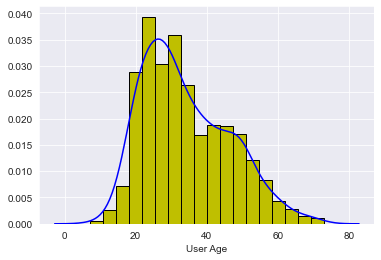

In [29]:
sns.distplot(user['age'],color='blue',axlabel='User Age',hist_kws={"edgecolor":"k","linewidth": 1,"alpha": 1, "color": "y"})

In [36]:
## Extract Year from the release date column
movie['release YEAR']=None
for i,row in movie.iterrows():
    movie['release YEAR'][i]=row['release date'].split('-',3)[2]

<ipython-input-36-ff2652de8106>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['release YEAR'][i]=row['release date'].split('-',3)[2]


In [39]:
movie.head(2)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release YEAR
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


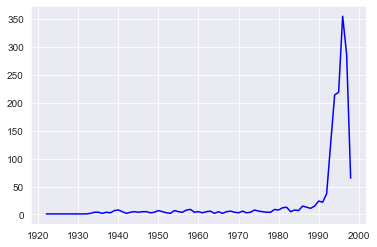

In [40]:
## Line plot for release Year
movie_group=movie.groupby(['release YEAR'])['movie id'].count()
movie_group=pd.DataFrame({'count':movie_group}).reset_index()
movie_group['release YEAR']=movie_group['release YEAR'].astype(int)
plt.plot('release YEAR','count','b',data=movie_group)


  Gender  Percent(%)
0      M        71.0
1      F        29.0


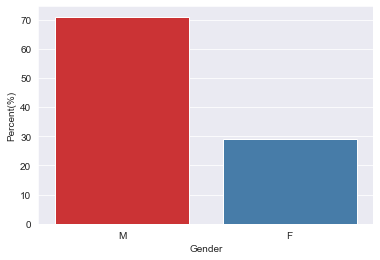

In [41]:
count=user['gender'].value_counts()
gender=user['gender'].unique()
percent=user['gender'].value_counts(normalize=True).mul(100).round(1)
gender_df=pd.DataFrame({'Gender':gender,'Percent(%)':percent}).reset_index()
gender_df=gender_df.drop(['index'],axis=1)
print(gender_df)
# plot Gender
sns.barplot(x='Gender',y='Percent(%)',data=gender_df,palette='Set1')



       Occupation  Percent(%)
0      technician        20.8
1           other        11.1
2          writer        10.1
3       executive         8.4
4   administrator         7.1
5         student         7.0
6          lawyer         5.4
7        educator         4.8
8       scientist         3.4
9   entertainment         3.3
10     programmer         3.0
11      librarian         2.9
12      homemaker         2.8
13         artist         1.9
14       engineer         1.7
15      marketing         1.5
16           none         1.3
17     healthcare         1.3
18        retired         1.0
19       salesman         0.7
20         doctor         0.7


[Text(0, 0, 'technician'),
 Text(0, 0, 'other'),
 Text(0, 0, 'writer'),
 Text(0, 0, 'executive'),
 Text(0, 0, 'administrator'),
 Text(0, 0, 'student'),
 Text(0, 0, 'lawyer'),
 Text(0, 0, 'educator'),
 Text(0, 0, 'scientist'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'programmer'),
 Text(0, 0, 'librarian'),
 Text(0, 0, 'homemaker'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'none'),
 Text(0, 0, 'healthcare'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'salesman'),
 Text(0, 0, 'doctor')]

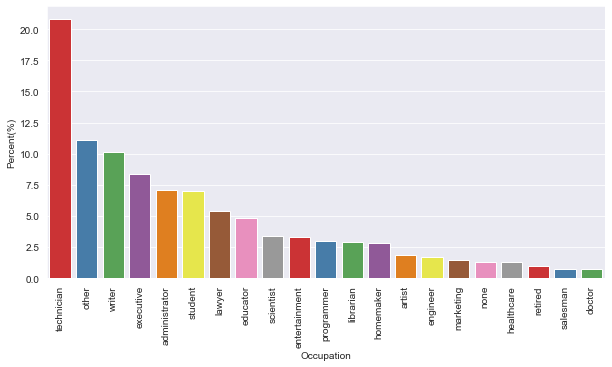

In [42]:

count=user['occupation'].value_counts()
occupation=user['occupation'].unique()
percent=user['occupation'].value_counts(normalize=True).mul(100).round(1)
occ_df=pd.DataFrame({'Occupation':occupation,'Percent(%)':percent}).reset_index()
occ_df=occ_df.drop(['index'],axis=1)
print(occ_df)
# plot occupation
plt.figure(figsize=(10,5))
chart=sns.barplot(x='Occupation',y='Percent(%)',data=occ_df,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


   Rating  Percent(%)
4       5         6.1
3       4        11.4
0       3        34.2
2       2        21.2
1       1        27.1


[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

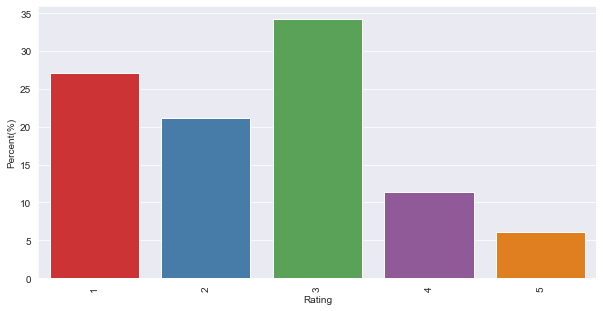

In [43]:
count=rating_df['rating'].value_counts()
rating=rating_df['rating'].unique()
percent=rating_df['rating'].value_counts(normalize=True).mul(100).round(1)
rate_df=pd.DataFrame({'Rating':rating,'Percent(%)':percent}).reset_index()
rate_df=rate_df.drop(['index'],axis=1)
print(rate_df.sort_values(by='Rating',ascending=False))
# plot occupation
plt.figure(figsize=(10,5))
chart=sns.barplot(x='Rating',y='Percent(%)',data=rate_df,palette='Set1')
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [44]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [45]:
movie.head(2)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release YEAR
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995


In [84]:
pop_movie=pd.DataFrame()
pop_movie=movie.drop(['movie id','movie title','release date'],axis=1)
pop_movie.head(3)

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release YEAR
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995


In [85]:
pop_movie=pop_movie.groupby('release YEAR').sum()

pop_movie['tot_release']=0
pop_movie['tot_release']=pop_movie.sum(axis=1)
    
    

In [86]:
pop_movie.head(3)

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tot_release
release YEAR,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [87]:
pop_movie=pop_movie.iloc[:,:-1].div(pop_movie['tot_release'], axis=0).round(1)*100
pop_movie.head(3)

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release YEAR,,,,,,,,,,,,,,,,,,,
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
pop_movie.reset_index(inplace=True)
pop_movie.head(2)
#sns.jointplot(kind='scatter', x='release YEAR',y='Action',data=pop_movie)

,release YEAR,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


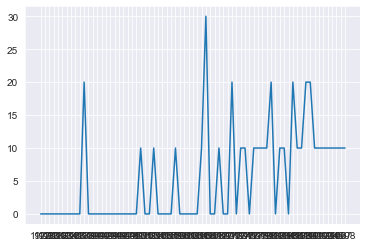

In [51]:
plt.plot('release YEAR','Action',data=pop_movie)


In [89]:
pop_movie=pop_movie.set_index('release YEAR').unstack()
pop_movie.head(3)

         release YEAR
unknown  1922            0.0
         1926            0.0
         1930            0.0
dtype: float64

In [90]:
pop_movie.head(20)

         release YEAR
unknown  1922            0.0
         1926            0.0
         1930            0.0
         1931            0.0
         1932            0.0
         1933            0.0
         1934            0.0
         1935            0.0
         1936            0.0
         1937            0.0
         1938            0.0
         1939            0.0
         1940            0.0
         1941            0.0
         1942            0.0
         1943            0.0
         1944            0.0
         1945            0.0
         1946            0.0
         1947            0.0
dtype: float64

In [53]:
pop_movie=pop_movie.reset_index()
pop_movie.rename(columns={'level_0':'Genre',0:'Percent'},inplace=True)

In [54]:
pop_movie.groupby(['Genre','release YEAR']).sum().head(3)

Percent
Genre  release YEAR         
Action 1922              0.0
       1926              0.0
       1930              0.0

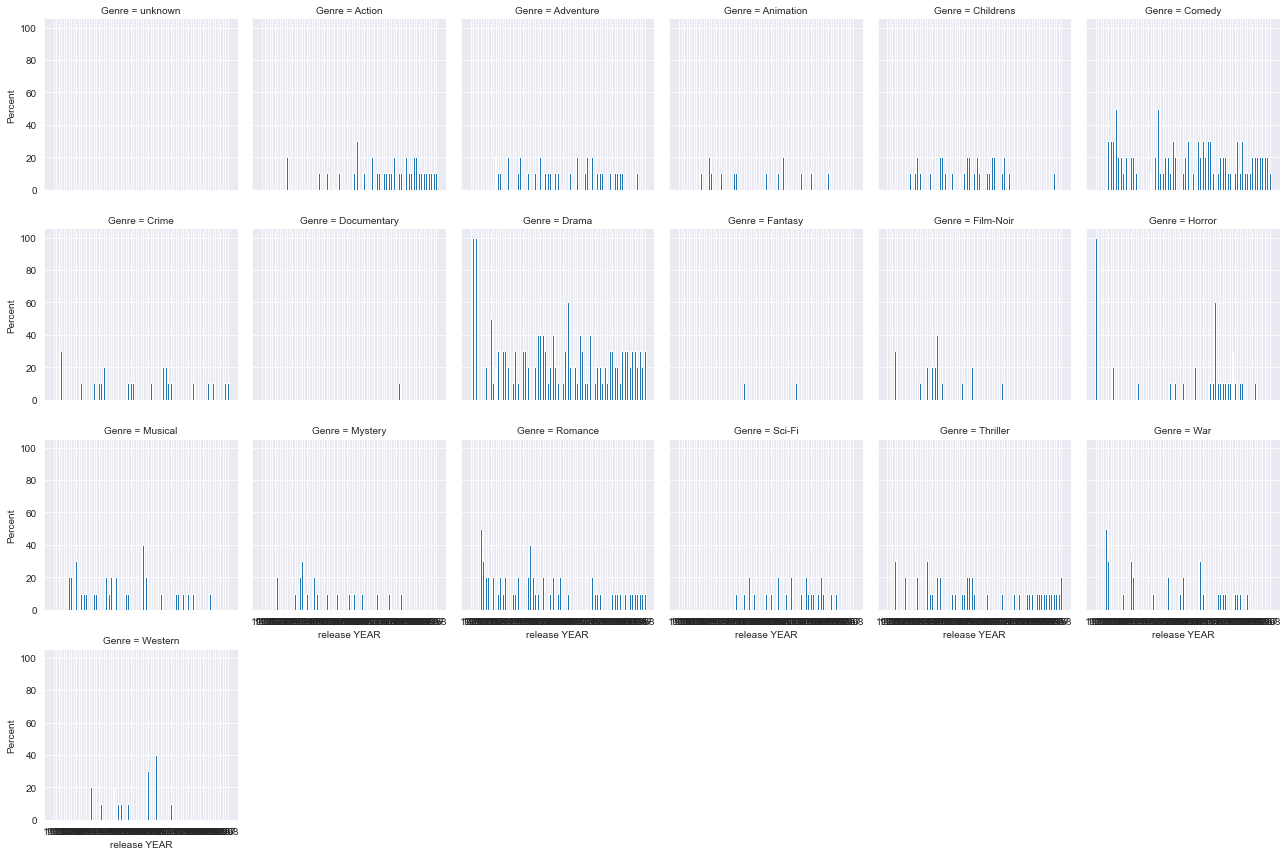

In [56]:
import seaborn as sns
m=sns.FacetGrid(pop_movie,col='Genre',col_wrap=6,margin_titles=True)
m.map(plt.bar,'release YEAR','Percent')


### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [79]:
rate_df=pd.DataFrame()
rating_count=rating_df.groupby('movie id')['rating'].count()
rate_sum=rating_df.groupby('movie id')['rating'].sum()
rate_df=pd.DataFrame({'rating_count':rating_count,'rating_sum':rate_sum}).reset_index()
rate_df['AvgRatings']=None
for i,row in rate_df.iterrows():
    rate_df['AvgRatings'][i]=row['rating_sum']/row['rating_count']
##rate_df.head(2)

<ipython-input-79-041e041a3502>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df['AvgRatings'][i]=row['rating_sum']/row['rating_count']


In [80]:
rate_df=rate_df.loc[rate_df['rating_count']>100]
top25=rate_df.sort_values(by='AvgRatings',ascending=False).head(25)
top25=top25[['movie id','AvgRatings']]
top25=top25.merge(movie,on='movie id',how='left')
top25=top25[['movie title','AvgRatings']]
top25

,movie title,AvgRatings
0,"Close Shave, A",4.49107
1,Schindler's List,4.46644
2,"Wrong Trousers, The",4.4661
3,Casablanca,4.45679
4,"Shawshank Redemption, The",4.44523
5,Rear Window,4.38756
6,"Usual Suspects, The",4.38577
7,Star Wars,4.35849
8,12 Angry Men,4.344
9,Citizen Kane,4.29293


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [113]:
merge1=rating_df.merge(movie,on='movie id',how='left')
merged=merge1.merge(user,on='user id',how='left')
merged.head(5)
##sns.barplot(x='Genre',y='rating_count',hue='Gender',data=gg_df)

,user id,movie id,rating,timestamp,movie title,release date,unknown,Action,Adventure,Animation,...,Romance,Sci-Fi,Thriller,War,Western,release YEAR,age,gender,occupation,zip code
0,196,242,3,881250949,Kolya,24-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1997,49,M,writer,55105
1,186,302,3,891717742,L.A. Confidential,01-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1997,39,F,executive,00000
2,22,377,1,878887116,Heavyweights,01-Jan-1994,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1994,25,M,writer,40206
3,244,51,2,880606923,Legends of the Fall,01-Jan-1994,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1994,28,M,technician,80525
4,166,346,1,886397596,Jackie Brown,01-Jan-1997,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1997,47,M,educator,55113


In [114]:
merged=merged[['movie id','rating', 'unknown', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western','gender']]
merged.head(3)

,movie id,rating,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,gender
0,242,3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M
1,302,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,F
2,377,1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,M


In [117]:
drama=merged[merged['Drama']==1]
drama.groupby('gender')['rating'].count()

gender
F    11008
M    28887
Name: rating, dtype: int64

In [118]:
tot=merged.groupby('gender')['rating'].count()
tot

gender
F    25740
M    74260
Name: rating, dtype: int64

In [119]:
drama_df=pd.DataFrame({'tot_count':merged.groupby('gender')['rating'].count(),'drama_count':drama.groupby('gender')['rating'].count()})

AttributeError: 'DataFrame' object has no attribute 'grouby'